<a href="https://colab.research.google.com/github/Anil1331/EIP3-Assignments/blob/master/Gradcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
!pip install image-classifiers

In [0]:
from classification_models import Classifiers
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers.advanced_activations import Softmax
classifier, preprocess_input = Classifiers.get('resnet18')
model = classifier((32, 32, 3), weights='imagenet', include_top=False)
x=model.output    
x=Flatten()(x)
x = Dense(256, activation='softmax')(x)
#x = Dropout(0.5)(x)
predictions=Dense(10, activation='softmax')(x)
model = Model(inputs=model.input, outputs=predictions)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_307 (ZeroPadding (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_307[0][0]         
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!cp drive/'My Drive'/resnet_18.h5 .
model.load("resnet_18.h5")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
predict = model.predict(x_test)

In [0]:
import numpy as np
predicted_labels = [np.argmax(x, axis=-1) for x in predict]
labels = [np.argmax(x, axis=-1) for x in y_test]
indices = [i for i, x in enumerate(predicted_labels) if predicted_labels[i]!=labels[i]]

In [0]:
import random
%matplotlib inline
from keras import backend as k
from PIL import Image
from numpy import zeros, newaxis
import cv2
from google.colab.patches import cv2_imshow
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
def plot_images(num_rows, num_cols):
  fault = random.sample([i for i in range(len(indices))], num_rows*num_cols)
  f, axarr = plt.subplots(num_rows, num_cols*2)
  for v, i in enumerate(fault):
    class_idx = np.argmax(predict[i], axis=-1)
    class_output = model.output[:, class_idx]
    last_conv_layer = model.layers[-44]
    class_output = model.output[:, class_idx]
    img = x_test[i]
    img = img.copy()
    x = [img]
    grads = k.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = k.mean(grads, axis=(0, 1, 2))
    iterate = k.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(128):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    img = np.uint8(255 * img)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    axarr[int(v/num_cols),2*(v%num_cols)].imshow(img)
    axarr[int(v/num_cols),2*(v%num_cols)+1].imshow(superimposed_img)

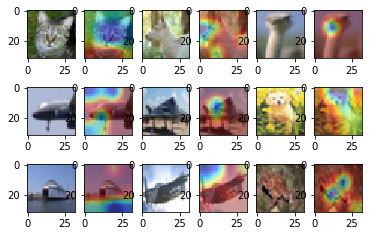

In [0]:
plot_images(3, 3)

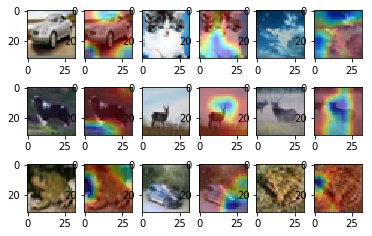

In [0]:
plot_images(3, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


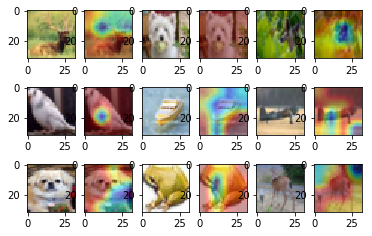

In [0]:
plot_images(3, 3)

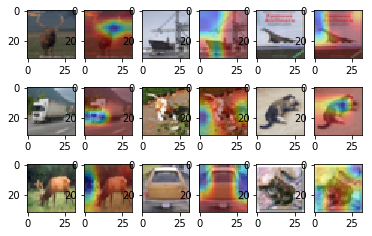

In [0]:
plot_images(3, 3)

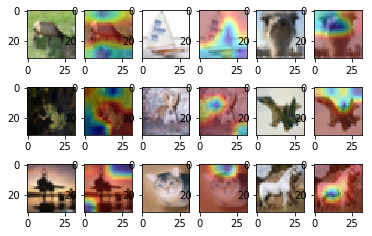

In [0]:
plot_images(3, 3)

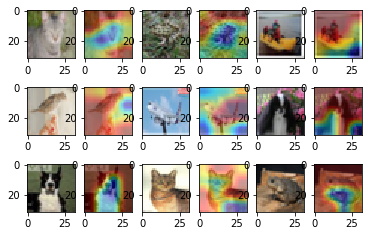

In [0]:
plot_images(3, 3)